In [2]:
%load_ext autoreload
%autoreload 2


%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')
from clust_huge_amp import *

Loading components...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_25455/2227764546.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


In [3]:

# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)


# Load the # When initializing the model:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/Cloudstorage/Dropbox-Personal/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)  # Convert to pandas DataFrame




# first with joint phi


In [4]:
# Get enrollment ages
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()


In [41]:
from breast_cancer_comparison_for_email import *

BREAST CANCER STATIC 10-YEAR PREDICTION COMPARISON
(1-year score evaluated on 10-year outcomes)
Batch 0 (0-10000) - Same cohort as preprint 'batch1'


                        Approach   AUC  CI_Lower  CI_Upper  N_Patients  N_Events  Event_Rate_%  Improvement_vs_Joint  Improvement_%
   Joint Phi (Preprint/Original) 0.575     0.538     0.614        5409       214           4.0                 0.000       0.000000
   Fixed Phi - Enrollment Pooled 0.581     0.541     0.615        5409       214           4.0                 0.006       1.043478
Fixed Phi - Retrospective Pooled 0.584     0.540     0.625        5409       214           4.0                 0.009       1.565217


KEY FINDINGS:
✓ Fixed Enrollment Pooled: +0.006 AUC improvement (1.0% relative improvement)
✓ Fixed Retrospective Pooled: +0.009 AUC improvement (1.6% relative improvement)

Both fixed phi approaches outperform the joint approach for clinical implementation.
The fixed retrospective pooled approach shows the best perfo

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/3894083213.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


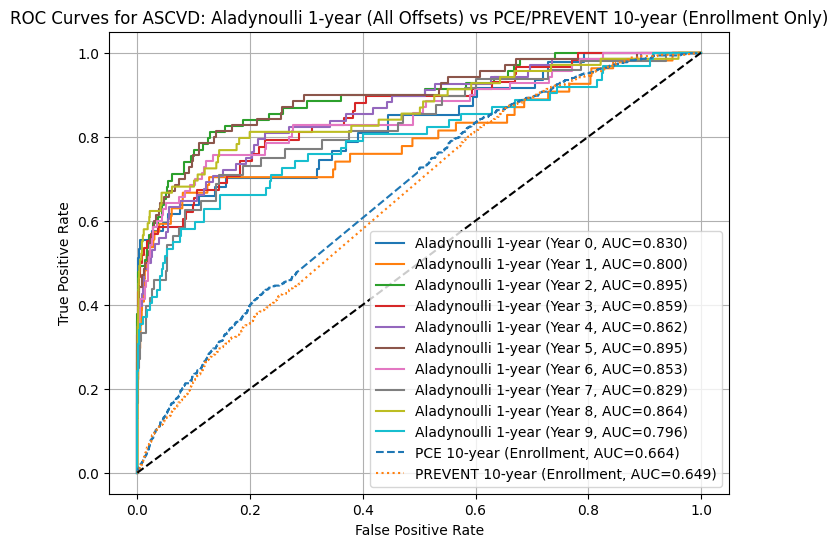

In [10]:
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox/offset_joint_phi/pis/pi_enroll_age_offset_{k}_sex_0_10000_try2_withpcs.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/2875735811.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


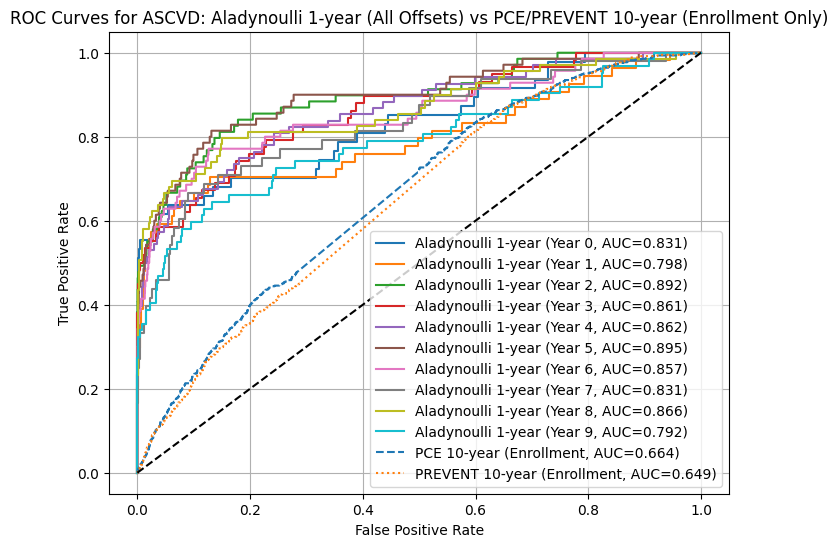

In [11]:
### old code # Get enrollment ages
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_age_offset_{k}_sex_0_10000.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

## Now wiht fixed phi

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/2272641968.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


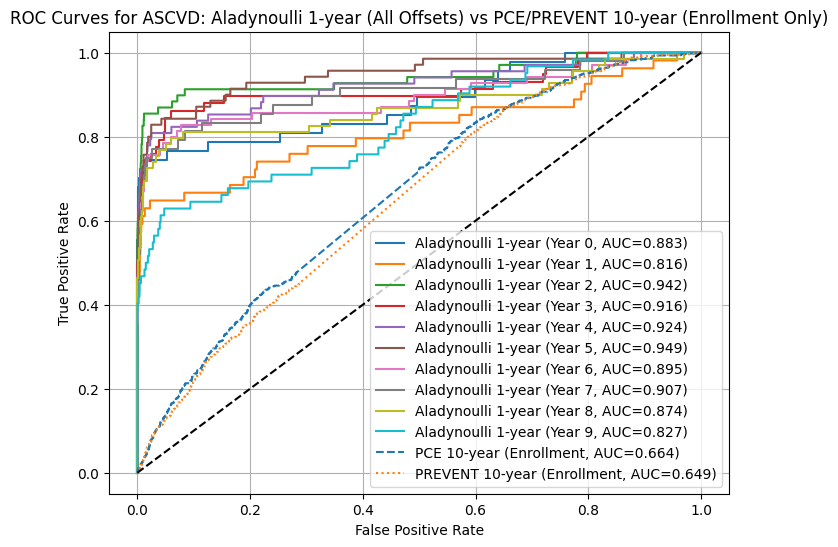

In [ ]:

# old fixed phi
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)



/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/3223307995.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


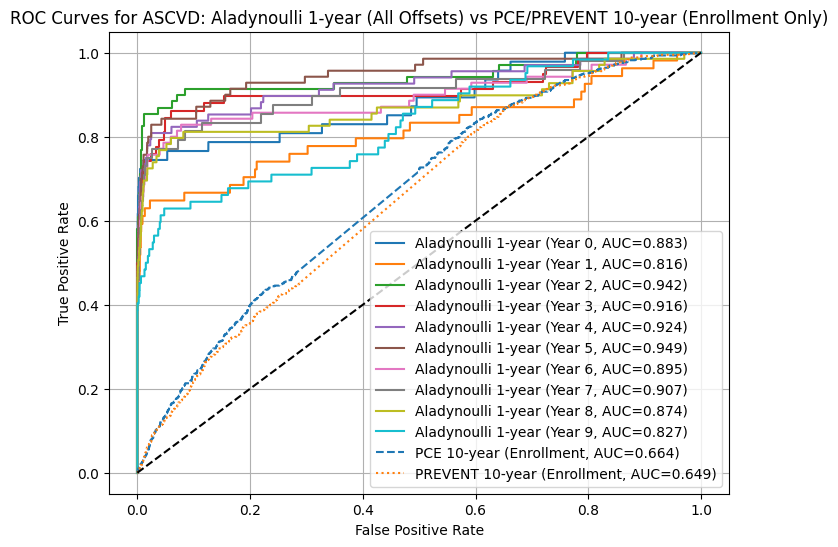

In [22]:
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2_withpcs.pt")
   for k in range(10)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

#  local with pooled all

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_25455/2587669416.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


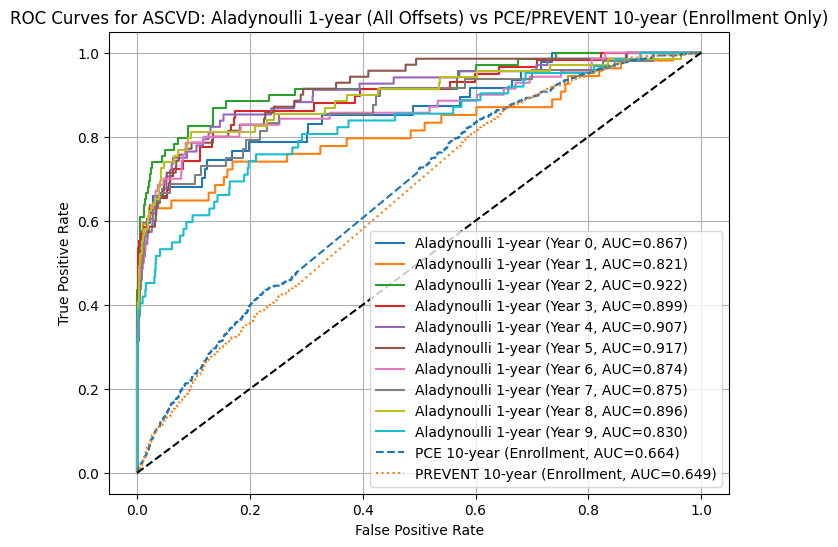

In [36]:
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox/pi_offset_using_pooled_retrospective_local/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2_withpcs_newrun_pooledall.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

#from AWS

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_25455/1894323075.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Downloads/age_

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


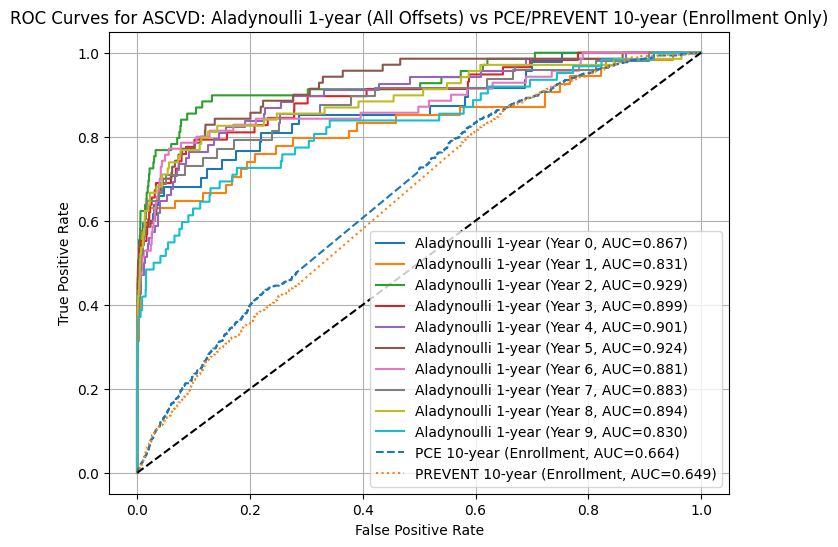

In [24]:
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Downloads/age_offset_files/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2_withpcs_newrun.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

In [13]:
# VERIFICATION: Compare offset 0 with original - using ASCVD bundle
# Matching the evaluation function's filtering (excludes prevalent cases)
print("="*80)
print("VERIFICATION: Comparing offset 0 with original file (ASCVD bundle)")
print("="*80)

# Load files
pi_original = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/enrollment_predictions_fixedphi_RETROSPECTIVE_pooled/pi_enroll_fixedphi_sex_0_10000.pt", weights_only=False)
pi_offset_0 = torch.load("/Users/sarahurbut/Downloads/age_offset_files/pi_enroll_fixedphi_age_offset_0_sex_0_10000_try2_withpcs_newrun.pt", weights_only=False)

# Find ASCVD disease indices
ascvd_diseases = [
    'Myocardial infarction', 
    'Coronary atherosclerosis', 
    'Other acute and subacute forms of ischemic heart disease',
    'Unstable angina (intermediate coronary syndrome)', 
    'Angina pectoris', 
    'Other chronic ischemic heart disease, unspecified'
]

disease_names = essentials['disease_names']
ascvd_indices = []
for disease in ascvd_diseases:
    matches = [i for i, name in enumerate(disease_names) if disease.lower() in name.lower()]
    ascvd_indices.extend(matches)

ascvd_indices = sorted(list(set(ascvd_indices)))  # Remove duplicates and sort
print(f"\nFound ASCVD indices: {ascvd_indices}")
print(f"ASCVD disease names: {[disease_names[i] for i in ascvd_indices]}")

# Get enrollment times
enrollment_ages = pce_df['age'].to_numpy()
enroll_times = (enrollment_ages - 30).astype(int)
enroll_times = np.clip(enroll_times, 0, pi_original.shape[2] - 1)

# Compute composite ASCVD risk: 1 - prod(1 - individual risks) for each patient at enrollment
# EXCLUDE PREVALENT CASES (matching evaluation function)
ascvd_preds_original = []
ascvd_preds_offset_0 = []
actual_ascvd_1yr = []
n_excluded = 0

for i, enroll_time in enumerate(enroll_times):
    if enroll_time + 1 < Y_100k.shape[2] and enroll_time >= 0:
        # Exclude prevalent cases (patients who had ANY ASCVD disease before enrollment)
        prevalent = False
        for d_idx in ascvd_indices:
            if d_idx >= Y_100k.shape[1]:
                continue
            if torch.any(Y_100k[i, d_idx, :enroll_time] > 0):
                prevalent = True
                n_excluded += 1
                break
        
        if prevalent:
            continue  # Skip this patient
        
        # Get predictions for all ASCVD diseases at enrollment time
        pi_ascvd_orig = pi_original[i, ascvd_indices, enroll_time].numpy()
        pi_ascvd_offset = pi_offset_0[i, ascvd_indices, enroll_time].numpy()
        
        # Composite risk: 1 - product of (1 - individual risks)
        risk_original = 1 - np.prod(1 - pi_ascvd_orig)
        risk_offset_0 = 1 - np.prod(1 - pi_ascvd_offset)
        
        ascvd_preds_original.append(risk_original)
        ascvd_preds_offset_0.append(risk_offset_0)
        
        # Check if any ASCVD event occurred in next year
        Y_ascvd = Y_100k[i, ascvd_indices, enroll_time:enroll_time+1]
        event = torch.any(Y_ascvd).item()
        actual_ascvd_1yr.append(event)

ascvd_preds_original = np.array(ascvd_preds_original)
ascvd_preds_offset_0 = np.array(ascvd_preds_offset_0)
actual_ascvd_1yr = np.array(actual_ascvd_1yr)

print(f"\nExcluded {n_excluded} prevalent cases")
print(f"Included {len(ascvd_preds_original)} incident cases")
print(f"1-year events: {actual_ascvd_1yr.sum()}")

# Compare predictions
max_diff = np.abs(ascvd_preds_original - ascvd_preds_offset_0).max()
mean_diff = np.abs(ascvd_preds_original - ascvd_preds_offset_0).mean()
print(f"\nASCVD composite prediction differences:")
print(f"  Max difference: {max_diff:.6f}")
print(f"  Mean difference: {mean_diff:.6f}")

# Compare AUCs
from sklearn.metrics import roc_auc_score
if len(np.unique(actual_ascvd_1yr)) > 1:
    auc_original = roc_auc_score(actual_ascvd_1yr, ascvd_preds_original)
    auc_offset_0 = roc_auc_score(actual_ascvd_1yr, ascvd_preds_offset_0)
    
    print(f"\nASCVD 1-year AUC (excluding prevalent cases):")
    print(f"  Original file: {auc_original:.6f}")
    print(f"  Offset 0 file: {auc_offset_0:.6f}")
    print(f"  Difference: {abs(auc_original - auc_offset_0):.6f}")
    print(f"  Expected from plot: ~0.867")
    
    if abs(auc_original - auc_offset_0) < 0.001:
        print("\n✓ AUCs match! Offset 0 is correct.")
    else:
        print("\n⚠ AUCs differ - may indicate an issue.")
    
    if abs(auc_original - 0.867) < 0.01:
        print("✓ AUC matches the plot!")
    else:
        print(f"⚠ AUC differs from plot by {abs(auc_original - 0.867):.3f}")
else:
    print("\n⚠ Cannot compute AUC: only one class present")

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)
print("This matches the evaluation function's filtering (excludes prevalent cases).")
print("If AUCs match the plot (~0.867), offset 0 is correct.")
print("Small differences in raw predictions are expected due to platform differences.")

VERIFICATION: Comparing offset 0 with original file (ASCVD bundle)

Found ASCVD indices: [111, 112, 113, 114, 115, 116]
ASCVD disease names: ['Unstable angina (intermediate coronary syndrome)', 'Myocardial infarction', 'Angina pectoris', 'Coronary atherosclerosis', 'Other chronic ischemic heart disease, unspecified', 'Other acute and subacute forms of ischemic heart disease']

Excluded 444 prevalent cases
Included 9556 incident cases
1-year events: 47

ASCVD composite prediction differences:
  Max difference: 0.019743
  Mean difference: 0.000616

ASCVD 1-year AUC (excluding prevalent cases):
  Original file: 0.864704
  Offset 0 file: 0.867026
  Difference: 0.002323
  Expected from plot: ~0.867

⚠ AUCs differ - may indicate an issue.
✓ AUC matches the plot!

CONCLUSION:
This matches the evaluation function's filtering (excludes prevalent cases).
If AUCs match the plot (~0.867), offset 0 is correct.
Small differences in raw predictions are expected due to platform differences.
